# Importing Data from [OpenStreetMap (OSM)](https://www.openstreetmap.org) with [osmdata](https://cran.r-project.org/web/packages/osmdata/index.html)
### by [Kate Vavra-Musser](https://vavramusser.github.io) for the [R Spatial Notebook Series](https://vavramusser.github.io/r-spatial)

## Introduction

[**OpenStreetMap (OSM)**](https://www.openstreetmap.org) is a collaborative, open-source mapping platform that provides rich geographic data contributed by a global community of volunteers. OSM includes information on streets, buildings, amenities, and natural features, making it a valuable resource for spatial analysis and mapping.

### Notebook Goals
In this notebook, we will explore how to use [rosmdata](https://cran.r-project.org/web/packages/osmdata/index.html) to import data from Open Street Map (OSM).

### ✨ Prerequisites ✨
* Complete [Chapter 1.3 Introduction to OpenStreetMap (OSM)](https://platform.i-guide.io/notebooks/e7796dde-de2e-4745-a9e3-5880d2f28803)

### Notebook Overview
1. Setup
2. Explore Available Data from OSM
3. Download and Save Data from OSM

## 1. Setup
This section will guide you through the process of installing essential packages.

#### Required Packages

[**ggplot2**](https://cran.r-project.org/web/packages/ggplot2/index.html) · Create Elegant Data Visualisations Using the Grammar of Graphics · A system for *declaratively* creating graphics, based on *The Grammar of Graphics*. You provide the data, tell *ggplot2* how to map variables to aesthetics, what graphical primitives to use, and it takes care of the details. · This notebook uses the following functions from *ggplot2*.

* *CoordSf* · visualize sf objects
  * *geom_sf* · geometric objects (points, lines, or polygons)
* [*ggplot*](https://rdrr.io/cran/ggplot2/man/ggplot.html) · create a new ggplot

[**osmdata**](https://cran.r-project.org/web/packages/osmdata/index.html) · Import [OpenStreetMap](https://www.openstreetmap.org) with Data as Simple Features or Spatial Objects.  This notebook uses the following functions from *osmdata*.

* [*add_osm_feature*](https://rdrr.io/cran/osmdata/man/add_osm_feature.html) · add a feature to an Overpass query
* [*opq*](https://rdrr.io/cran/osmdata/man/opq.html) · build an Overpass query
* [*osmdata_sf*](https://rdrr.io/cran/osmdata/man/osmdata_sf.html) · Rreturn an OSM Overpass query as an osmdata object in *sf* format

[**sf**](https://cran.r-project.org/web/packages/sf/index.html) · Support for [simple features](https://r-spatial.github.io/sf/articles/sf1.html), a standardized way to encode spatial vector data - Binds to [*GDAL*](https://gdal.org/en/stable) for reading and writing data, to [*GEOS*](https://libgeos.org) for geometrical operations, and to [*PROJ*](https://proj.org/en/stable) for projection conversions and datum transformations - Uses by default the [*s2*](https://cran.r-project.org/web/packages/s2/index.html) package for spherical geometry operations on ellipsoidal (long/lat) coordinates · This notebook uses the following functions from *sf*.

* [*st_geometry*](https://rdrr.io/cran/sf/man/st_geometry.html) · get, set, replace or rename geometry from an sf object
* [*st_write*](https://rdrr.io/cran/sf/man/st_write.html) · write simple features object to file or database

### 1a. Install and Load Required Packages
If you have not already installed the required packages, uncomment and run the code below:

In [38]:
# install.packages("ggplot2", "osmdata", "sf")

Load the packages into your workspace.

In [37]:
library(ggplot2)
library(osmdata)
library(sf)

## 2. Explore Available Data from OpenStreetMap

For this exercise, we will be using the **osmdata** R package to access OSM data via the *Overpass API*, OSM's native API.  Advanced users can learn more about the API by reviewing the [Overpass API User's Manual](https://dev.overpass-api.de/overpass-doc/en).

### 2a. Review the List Data Types

When using the Overapp API, you will need to specify the type of feature or features you are interested in extracting.  OSM includes a wide range and variety of features and users have access to all data available from the OSM platform.  To specify the specific feature type you are interested in, you will need to pass the feature's key to your API call.

Use the [Map Features page from the OSM Wiki](https://wiki.openstreetmap.org/wiki/Map_features) to review available feature types and their respective keys.

While using OSM and OSM data, rememember that OSM has been populated by volunteered user input.  Therefore, while OSM is a fantastic data source, you should not necessairly assume that the data included in OSM is exhaustive.  Additionally, many OSM features are region- or culture-specifc and may not be relevant for all queries.  Features might also have slightly different meanings in different regions, due to differences in cultural or regional definitions of terms and concepts.  Some feature types are less specific than others and many feature types overlap one another.  A given feature may be tagged with more than one feature tag.  OSM data users should remember that feature categorization might not be uniform, even in the same geographic area.

For example, OSM includes feature tags for amenities, including the *sustenance* sub-cateogry which includes feature tags for *bar*, *biergarten*, *cafe*, *fast_food*, *food_court*, *ice_cream*, *pub*, and *restaurant* and the specific tags used for a given feature is at the discretion of the OSM volunteer contributors and editors.  A informal-type location which serves casual meals and beverages including alcohol may arguably be tagged using some combination of one or more of *bar*, *biergarten*, *cafe*, *fast_food*, *pub*, and *restaurant*.

Users should consider the likely volume of users who are interested in contributing to and updating OSM's data for their specific area of interest.  A major city or touist destination in a country with a high volume of OSM users, such as the United States, Germany, and Indonesia, is likely to see see a high volume of contributions, updates, and corrections and is more likely to be up-to-date and complete.  While remote areas, areas with low population, informal settlements, and countries with low OSM useage might see little to no OSM contribution or may be slow to update and correct existing information.  Some countries, such as North Korea, Pakistan, and Somalia have low OSM data due to government restrictions.

## 3. Download and Save Data from OpenStreetMap

...

### 3a Primary and Secondary Highway Data for the City of Chicago

OSM provides datasets across three scales:

* Small scale (1:110 meters): Best for global or continental-scale analysis.
* Medium scale (1:50 meters): Useful for regional or country-level analysis.
* Large scale (1:10 meters): Provides the most detailed data, suitable for local-level analysis.

Extracting data from OSM requires users to specify a bounding box or indicating the spatial extent of the search area for extracting data.  For this exercise, we will explore only data within the city of Chicago.  The step below defines the Chicago bounding box and saves it to the variable *bbox*.  The bounding box is defined using the latitude and longitude coorinates of the corners of the bounding box.

In [4]:
# define bounding box and get OSM basemap data
# this is the bounding box for the city of Chicago
bbox <- c(-87.94011, 41.64454, -87.52414, 42.02304)

For this exercise we will use *opq*, *add_osm_feature*, and *osmdata-sf* functions from the ***osmdata*** package to set up an API query using the Overpass API.

First, we can set up the base query using *opq*.  At minimum, this function requires a bounding box (*bbox*) so we will pass it the bounding box we previous created in the previous step.

In [5]:
query <- opq(bbox = bbox)

For this exercise, we will download the primary highways in the city of Chicago.  We want the querty to will retun all major highways which are located within or pass through the bounding box we specified in the step above.  To specify that we want primary highways, we will use the *add_osm_feature* function to indicate the type of data we are looking for.  Here we need to include both the key "highway" to indicate we are searching within the broad highway category, as well as the "primary" value to indicate that we want only primary highways as well as passing the querty information we created in the previous step.

In [9]:
feature_query <- add_osm_feature(query, key = "highway", value = "primary")

Finally, the last thing we need to do is specify that we want the query to be retuned as an *sf* object.  We'll pass the *feature_query* information to the *osmdata_sf* function from the ***osmdata*** package and outout the result to a new object called *chicago_highways_primary*.

In [14]:
# download primary highway data
chicago_highways_primary <- osmdata_sf(feature_query)

This notebook steps the user through each embedded step in the process to set up an OSM Overpass API query.  However, all steps can be combined in the same line of code to achieve the same result.

In [30]:
# download primary highway data (one-line version)
chicago_highways_primary <- osmdata_sf(add_osm_feature(opq(c(-87.94011, 41.64454, -87.52414, 42.02304)),
                                                       key = "highway", value = "primary"))

Let's take a look at the object returned by this query.

In [15]:
chicago_highways_primary

Object of class 'osmdata' with:
                 $bbox : 41.64454,-87.94011,42.02304,-87.52414
        $overpass_call : The call submitted to the overpass API
                 $meta : metadata including timestamp and version numbers
           $osm_points : 'sf' Simple Features Collection with 14473 points
            $osm_lines : 'sf' Simple Features Collection with 4844 linestrings
         $osm_polygons : 'sf' Simple Features Collection with 0 polygons
       $osm_multilines : NULL
    $osm_multipolygons : NULL




The *chicago_highways_primary* object is a simple features (*sf*) object which includes 14,473 points and 4,844 lines.  Viewing the metadata also shows us the original bounding box we used in the API call.

Let's make a simple plot of the line features in the *chicago_highways_primary* object using the base R *plot* function.

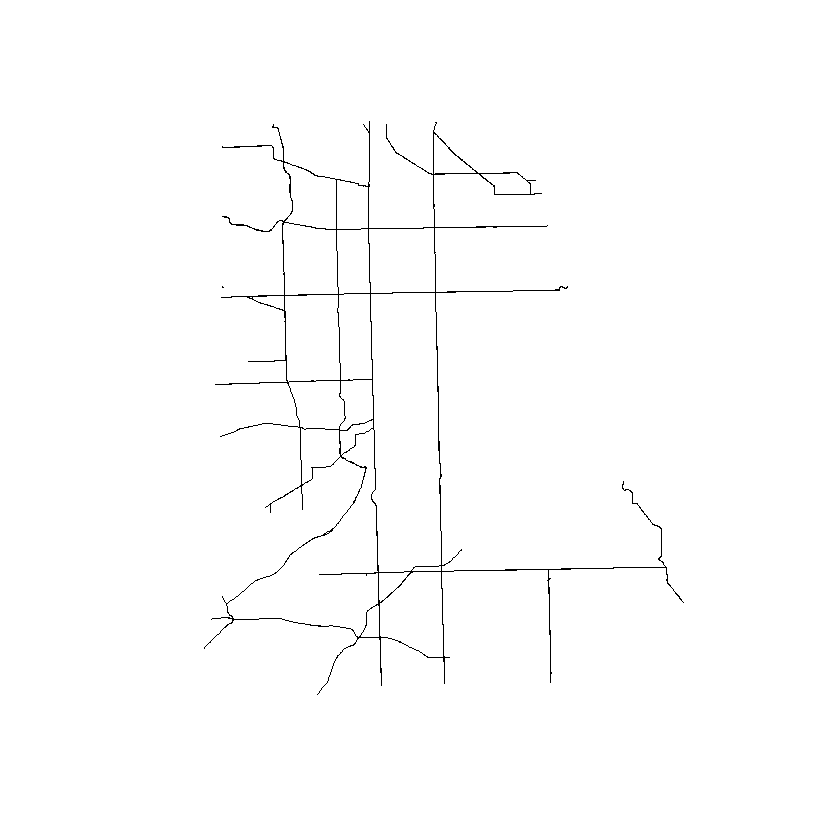

In [27]:
plot(st_geometry(chicago_highways_primary$osm_lines))

The simple map shows us the primary highways of Chicago represented by linestrings.

Next, let's walk through the same process to download secondary highways in the same area representing the city of Chicago.  The API call will be exactly the same except this time we will set the *value* parameter in the *add_osm_feature function to "secondary" rather than "primary".  This query will take considerably longer to complete since there are far more secondary highways than primary highways in our search area.

In [31]:
# download secondary highway data
chicago_highways_secondary <- osmdata_sf(add_osm_feature(opq(c(-87.94011, 41.64454, -87.52414, 42.02304)),
                                                       key = "highway", value = "secondary"))

Let's take a quick look at the metadata for the Chicago secondary highways.

In [33]:
chicago_highways_secondary

Object of class 'osmdata' with:
                 $bbox : 41.64454,-87.94011,42.02304,-87.52414
        $overpass_call : The call submitted to the overpass API
                 $meta : metadata including timestamp and version numbers
           $osm_points : 'sf' Simple Features Collection with 51400 points
            $osm_lines : 'sf' Simple Features Collection with 15450 linestrings
         $osm_polygons : 'sf' Simple Features Collection with 0 polygons
       $osm_multilines : NULL
    $osm_multipolygons : NULL




The data include 51,400 points and 15,450 linestrings representing the Chicago secondary highway data.

Let's make a quick map to view the secondary highways.

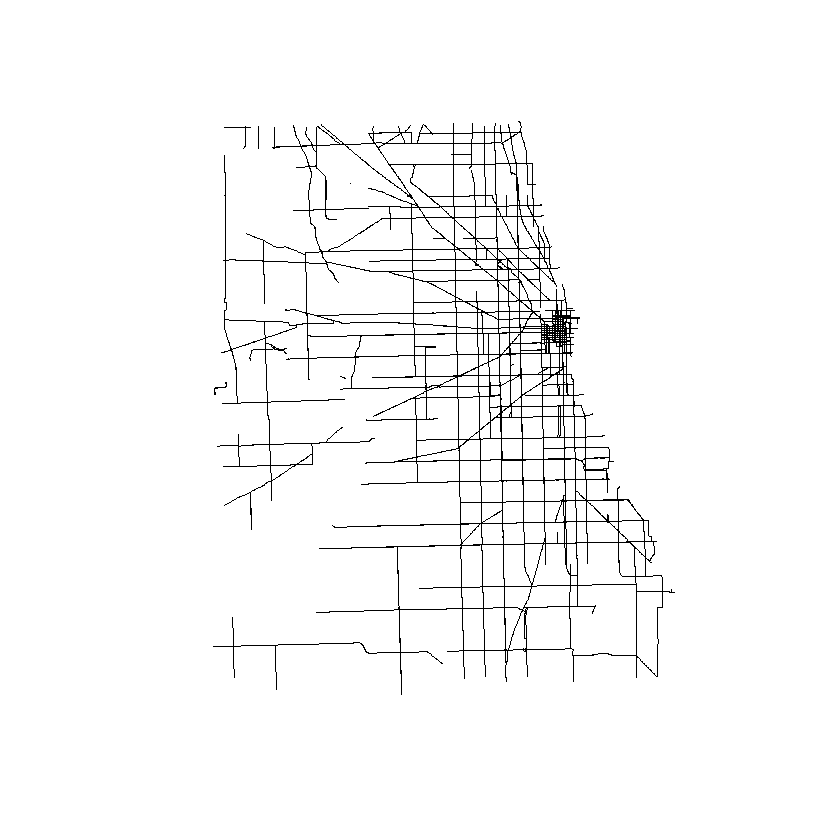

In [32]:
plot(st_geometry(chicago_highways_secondary$osm_lines))

We now have two sets of data extracted from the OpenStreetMap platform, primary and secondary highways from the Chicago metropolitain area.

Let's make a map with both highway types.  Since this map includes two sets of vector features and is therefore a little more complicated, let's use a very simple *ggplot* setup using functions from the *ggplot2* package rather than the base R *plot* function.  The following setup first initiallizes a ggplot using the *ggplot* function and then adds the two highway datasets as *sf* objects to the plot space using the *geom_sf* function.  We'll specify a red color for the primary highways and a gray color for the secondary highways.  We'll also specify that the plot should use the ggplot minimal theme by adding the *theme_minimal* funciton, this will make the map a little cleaner and easier to view than the defauly ggplot theme.

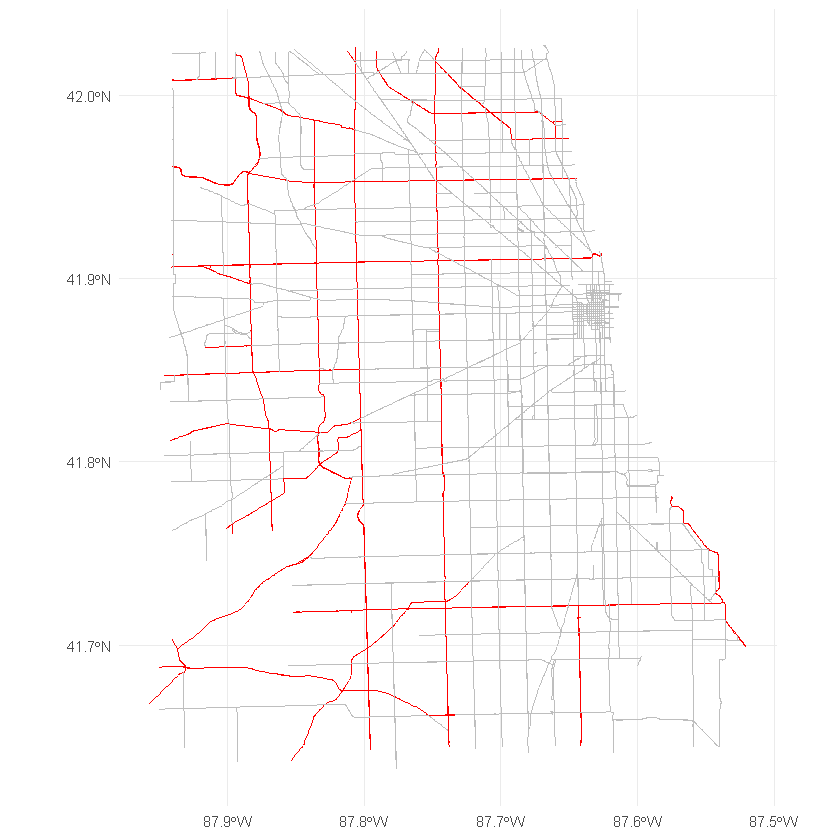

In [40]:
# plot the basemap and overlay
ggplot() +
  geom_sf(data = chicago_highways_primary$osm_lines, color = "red") +
  geom_sf(data = chicago_highways_secondary$osm_lines, color = "gray") +
  theme_minimal()

The result is a simple map of Chicago highways, entirely using OSM data we extracted from the OSM database directly to our workspace.  We can continue to refine our map, use the data in other projects within our R workspace, or save the data to our local machine.

---

## Next Steps

* Move on to Chapter 6: Mapping and Visualization
  * [**Chapter 6.1 Visualization and Quick Plots**](https://platform.i-guide.io/notebooks/dfe8fd72-f896-4dd2-9d61-6d9982394f1f)
  * [**Chapter 6.2 Mapping Point and Polygon Data**](https://platform.i-guide.io/notebooks/2b9f579c-32b0-4078-af39-994bb31d50ec)
  * [**Chapter 6.3 Choropleth Mapping**](https://platform.i-guide.io/notebooks/f2f973df-2412-49f0-ad39-d80051f20d4d)
* Return to the [**R Spatial Notebooks Project Chapter List**](https://vavramusser.github.io/r-spatial/#:~:text=R%20Spatial%20Notebooks%20Chapter%20List) to view a list of all available notebooks organized in the R Spatial Notebooks chapter structure.
* Visit the [**R Spatial Notebooks Project Homepage**](https://vavramusser.github.io/r-spatial) to learn more about the project, view the list of all notebooks, and explore additional resources.
* Join the project [**Mailing List**](https://mailchi.mp/ab01e8fc8397/r-spatial-email-signup) to hear about future notebook releases and other updates.
* If you have an idea for a new notebook please submit your idea via the [**Suggestion Box**](https://us19.list-manage.com/survey?u=746bf8d366d6fbc99c699e714&id=54590a28ea&attribution=false).

---

## ★ Thank You ★

Thank you so much for engaging with this notebook and supporting the project!  The R Spatial Notebooks Project is a labor of love so if you enjoy or benefit from these notebooks, please consider [**Donating to the Project**](https://buymeacoffee.com/vavramusser).  Your support allows me to continue producing notebooks and supporting the R Spatial Notebooks community.